# **Evaluation**

## Objectives
Developing a solution for Business Requirement No. 2-3:   
- The client seeks to determine the specific variety of rice depicted in the uploaded images.  
- Download a prediction report.

This notebook focuses on evaluating the performance of the trained rice classification model. We aim to assess how well the model performs on unseen test data, ensuring its reliability and effectiveness for practical use.  
  
- Load the previously selected best model (final_rice_model.keras) for evaluation.  
- Using the ImageDataGenerator, prepare the test dataset, ensuring it is processed identically to how the training data was prepared.  
-  Evaluate the model on the test dataset to obtain key metrics such as accuracy and loss, providing a quantitative measure of model performance.  
- Generate predictions on the test set.  
- Compare predicted classes against true labels to assess model precision and recall.  
- Calculate and display a confusion matrix and classification report for a detailed analysis.  
- Iinclude visualizations such as a confusion matrix heatmap and a multi-class ROC curve to provide intuitive insights into model performance.  

Purpose: This evaluation process ensures the model's effectiveness in classifying rice types and helps identify any areas for improvement. It's crucial for validating the model's ability to generalize to new, unseen data.
## Inputs

- Images are taken from the test folder.  

         .
         ├── inputs   
         │   └──datasets_devided
         │      └──rice  
         │           ├── test  
         │           │   ├── Arborio  
         │           │   ├── Basmati  
         │           │   ├── Ipsala  
         │           │   ├── Jasmine 
         │           │   └── Karacadag
         │           ├── train
         │           │   ├── Arborio  
         │           │   ├── Basmati  
         │           │   ├── Ipsala  
         │           │   ├── Jasmine  
         │           │   └── Karacadag
         │           └── validation
         │               ├── Arborio  
         │               ├── Basmati  
         │               ├── Ipsala  
         │               ├── Jasmine  
         │               └── Karacadag  
         └── ...
The model was loaded from "outputs/final_model/final_rice_model.keras"

## Outputs  

- Model evaluation on saved file.
- Plot Confusion Matrix, Classification Report.
- Save evaluation pickle file
- Prediction on the random image file.

---

# Change working directory

We store our Jupyter notebooks in a subfolder of the project. Therefore, when we run the notebooks in the editor, we need to change the working directory. This is necessary to ensure proper access to data files and other project resources that might be located outside the notebook's subfolder.

We need to change the working directory from its current folder to its parent folder

- To access the current working directory, we use the os.getcwd() command. 

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Rice-Detector/jupyter_notebooks'

Then, we change the working directory from its current folder to its parent folder to facilitate the correct file path references within our notebooks.

- os.path.dirname() gets the parent directory
- os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Rice-Detector'

---

## Model Evaluation

### Load saved model

In [4]:
from tensorflow.keras.models import load_model

model_path = 'outputs/v2/final_model/final_rice_model.keras'
model = load_model(model_path)

2024-01-05 10:25:20.008567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Accuracy

- Evaluation of the model on the test set.  
- The performance on the test set meets the project requirements (at least 87% accuracy on test set) and answers Business Requirement #2.  

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image shape
image_shape = (224, 224, 3)

# Define the batch size
batch_size = 32

# Initialize the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test set
test_path = 'inputs/datasets_devided/test/'
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary' depending on your problem
    shuffle=False  # Typically, you don't shuffle the test set
)

# Evaluate the model
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ", evaluation[0])

Found 11250 images belonging to 5 classes.
352/352 [==============================] - 75s 211ms/step - loss: 0.0201 - accuracy: 0.9930
Model accuracy: 99.30%
Model Loss:  0.020129714161157608


### Test Loss and Accuracy, Confusion Matrix, Classification Report


The purpose of this code is to evaluate the performance of a pre-trained deep learning model on a test dataset. This evaluation includes assessing the model's accuracy, generating a confusion matrix, a classification report, and plotting ROC curves for each class. These metrics provide a comprehensive understanding of the model's effectiveness in classifying different categories.  

An ImageDataGenerator is used to prepare the test dataset. This generator rescales the images by 1./255 (normalizing pixel values) and configures the dataset for batch processing.  
The flow_from_directory method loads images from the specified directory, ensuring they match the input shape of the model and are batched as specified.  
The evaluate method assesses the model's performance on the test dataset, providing loss and accuracy metrics. These give a high-level view of the model's performance.  
The predict method generates predictions for the test set.  
The predicted classes are determined by selecting the class with the highest probability from the model's output.  
True class labels are extracted from the test set for comparison.  
A confusion matrix is generated, comparing true class labels with predicted labels. This matrix helps identify how well the model performs for each class and where misclassifications occur.  
A detailed report that includes precision, recall, and f1-score for each class, along with overall accuracy. This report gives a deeper insight into the model's performance across different classes.  
Visualizing these metrics through heatmaps can make it easier to interpret and communicate the findings to stakeholders who may not be familiar with technical aspects of model performance.

Found 11250 images belonging to 5 classes.
352/352 [==============================] - 64s 179ms/step - loss: 0.0201 - accuracy: 0.9930
Test Loss: 0.020129714161157608
Test Accuracy: 0.9929777979850769
352/352 [==============================] - 78s 220ms/step
Confusion Matrix:
 [[2239    0    0    7    4]
 [   0 2210    0   40    0]
 [   0    0 2250    0    0]
 [  10    4    1 2233    2]
 [  11    0    0    0 2239]]
Classification Report:
               precision    recall  f1-score   support

     Arborio       0.99      1.00      0.99      2250
     Basmati       1.00      0.98      0.99      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.98      0.99      0.99      2250
   Karacadag       1.00      1.00      1.00      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



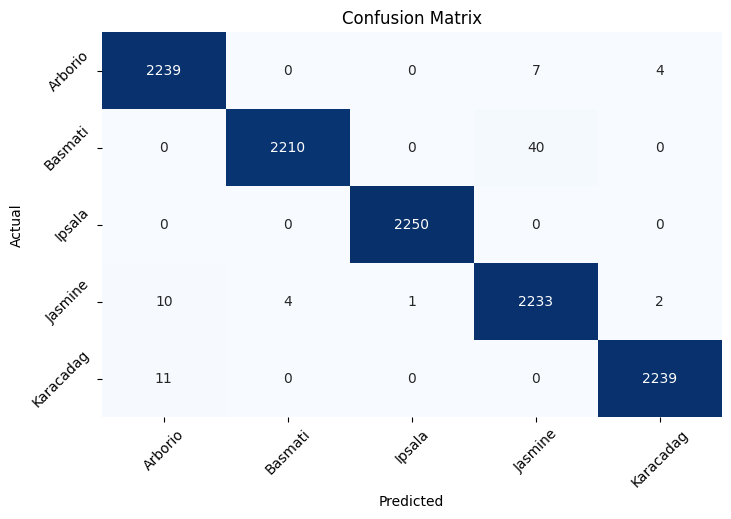

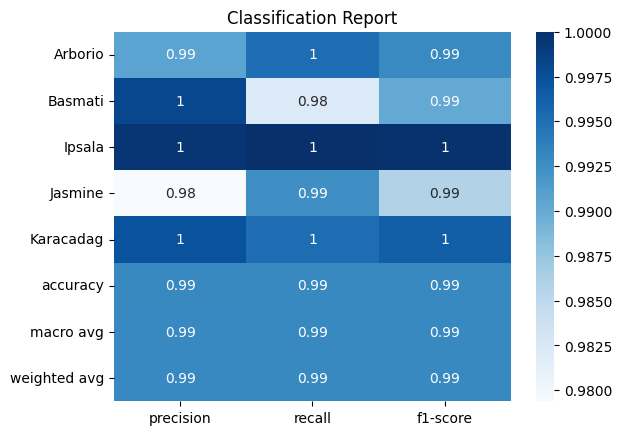

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Load model
model_path = 'outputs/v2/final_model/final_rice_model.keras'
model = load_model(model_path)

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'inputs/datasets_devided/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
evaluation = model.evaluate(test_set)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Predictions
test_set.reset()  # Resetting the generator
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix Visualisation
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("outputs/v2/performance/confusion_matrix.png")
plt.show()

# Classification Report Visualisation
clf_report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report')
plt.savefig("outputs/v2/performance/classification_report.png")
plt.show()

### ROC Curve and AUC:

ROC curves are plotted for each class, showing the trade-off between the true positive rate and false positive rate at various threshold settings.
The AUC (Area Under the Curve) is calculated for each class, providing a single measure of the model's performance across all thresholds.

This plot helps in visually assessing the model's ability to discriminate between classes.

This code is vital for thoroughly evaluating the performance of a model, especially in multi-class classification scenarios. It allows for a detailed understanding of where the model excels and where improvements are needed.

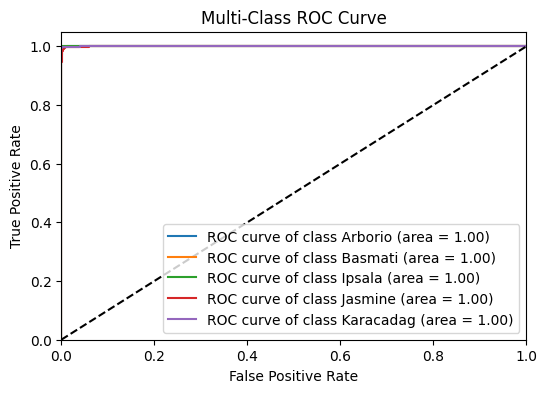

In [11]:
# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_labels)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curve
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.savefig("outputs/v2/performance/roc_curve.png")
plt.show()

In our dataset, the class distribution is very balanced, with each class being equally represented. This balance ensures that our model's performance evaluation does not need to heavily focus on addressing issues of class imbalance. As a result, detailed analyses such as 'macro avg', 'weighted avg', and synthetic per-label reports, which are particularly useful in datasets with significant class imbalances, are not as crucial for our current needs. Our model evaluation can, therefore, rely on standard metrics without the necessity for these specialized analyses, simplifying our approach while still providing a comprehensive understanding of our model's performance.

### Save evaluation pickle

In [22]:
import joblib
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

---

## Predict on new data

### Load random image as PIL

Selected image file: basmati (11898).jpg
Image shape: (224, 224), Image mode: RGB


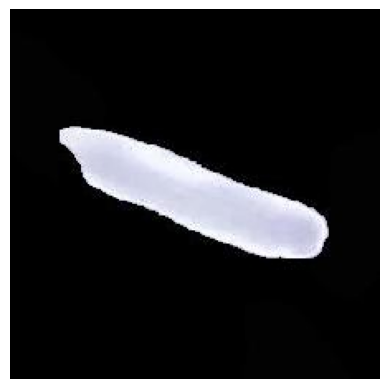

In [20]:
from tensorflow.keras.preprocessing import image
import random
import matplotlib.pyplot as plt
import numpy as np

# Path to the test dataset
test_path = 'inputs/datasets_devided/test/'

# Choose a random rice class
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
selected_class = random.choice(class_labels)

# Choose a random image from the selected class
image_files = os.listdir(os.path.join(test_path, selected_class))
selected_image_file = random.choice(image_files)

# Load the image
image_shape = (224, 224) 
pil_image = image.load_img(os.path.join(test_path, selected_class, selected_image_file), target_size=image_shape)
print(f"Selected image file: {selected_image_file}")
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')

# Display the image using matplotlib
plt.imshow(pil_image)
plt.axis('off')
plt.show()



### Predict class probabilities

In [21]:
# Prepare the image for prediction
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0) / 255

# Predict class probabilities
model_path = 'outputs/v2/final_model/final_rice_model.keras'
model = load_model(model_path)
pred_probabilities = model.predict(my_image)

# Determine the predicted class
pred_class_index = np.argmax(pred_probabilities, axis=1)[0]
pred_class = class_labels[pred_class_index]
pred_probability = pred_probabilities[0][pred_class_index]

print(f"Predicted class: {pred_class} with probability {round(pred_probability*100, 2)}%")

1/1 [==============================] - 0s 63ms/step
Predicted class: Basmati with probability 99.99%


---

### Creating a new version directory 'v2'

This is done to create a new version of the project, ensuring that each version's files are organized in a dedicated folder.

In [ ]:
import shutil

# Creating a new version directory 'v2' in 'outputs'
new_version_dir = 'outputs/v2'
os.makedirs(new_version_dir, exist_ok=True)

# Folders to be moved to the new version directory
# Moving these folders to 'v2' helps in maintaining a clear structure
# and organization of project files as per different versions.
folders_to_move = ['average_images', 'final_model', 'montage', 'performance']

# Moving the specified folders to 'v2'
for folder in folders_to_move:
    src_path = os.path.join('outputs', folder)
    dest_path = os.path.join(new_version_dir, folder)
    shutil.move(src_path, dest_path)

# Files to be copied to the new version directory
# These files are essential components of the project and need to be
# present in each version of the project for consistency.
files_to_copy = ['class_indices.pkl', 'evaluation.pkl', 'image_shape.pkl']

# Copying the specified files to 'v2'
# This ensures that each project version retains necessary configuration
# and model files for independent functioning.
for file in files_to_copy:
    src_file = os.path.join('outputs/v1', file)
    dest_file = os.path.join(new_version_dir, file)
    shutil.copy(src_file, dest_file)